In [1]:
print("""
@Description: Fitting a robust regression model using RANSAC
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-06-23 22:48:54
""")


@Description: Fitting a robust regression model using RANSAC
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-06-23 22:48:54



## Fitting a robust regression model using RANSAC

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('AmesHousing.txt', sep='\t', usecols=columns)
df['Central Air'] = df['Central Air'].map({'Y': 1, 'N': 0})
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [3]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
ransac = RANSACRegressor(
    LinearRegression(),
    max_trials=100,
    min_samples=.95, # randomly choose training examples to be at least 95%
    residual_threshold=None, 
    # scikit-learn uses the MAD estimate to select the inlier threshold
    # MAD stands for Median absolute deviation of the target values
    random_state=123
)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=123)

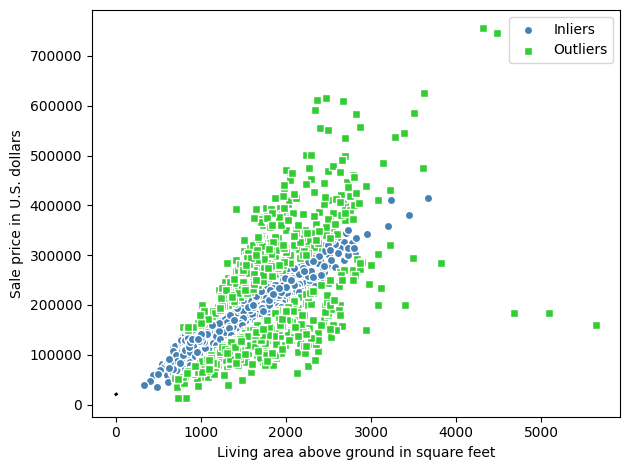

In [17]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
fig, ax = plt.subplots()
ax.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolor='white',
           marker='o', label='Inliers')
ax.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolor='white', 
           marker='s', label='Outliers')
ax.plot(line_X, line_y_ransac, color='black', lw=2)
ax.set_xlabel('Living area above ground in square feet')
ax.set_ylabel('Sale price in U.S. dollars')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
line_X

array([3, 4, 5, 6, 7, 8, 9])

In [21]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 106.451
Intercept: 20133.205


In [22]:
import sys
sys.path.append('./')
sys.path.append('../')

In [24]:
from utilsML.funcs import mean_absolute_deviation
mean_absolute_deviation(y)

58276.315729245536

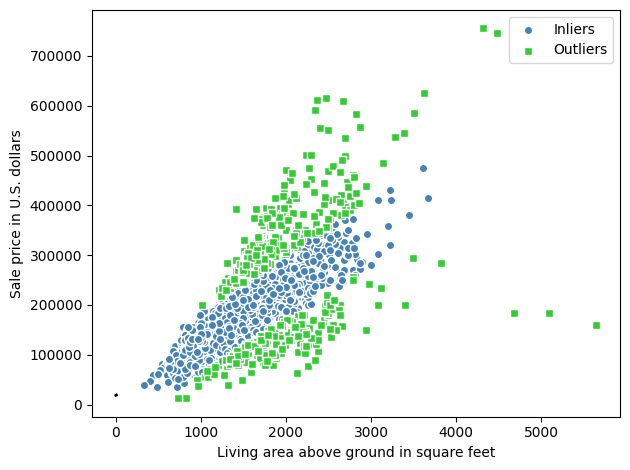

In [27]:
ransac_65000 = RANSACRegressor(
    LinearRegression(),
    max_trials=100,
    min_samples=.95, # randomly choose training examples to be at least 95%
    residual_threshold=65_000, 
    # scikit-learn uses the MAD estimate to select the inlier threshold
    # MAD stands for Median absolute deviation of the target values
    random_state=123
)
ransac_65000.fit(X, y)
inlier_mask = ransac_65000.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac_65000.predict(line_X[:, np.newaxis])
fig, ax = plt.subplots()
ax.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolor='white',
           marker='o', label='Inliers')
ax.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolor='white', 
           marker='s', label='Outliers')
ax.plot(line_X, line_y_ransac, color='black', lw=2)
ax.set_xlabel('Living area above ground in square feet')
ax.set_ylabel('Sale price in U.S. dollars')
plt.legend()
plt.tight_layout()
plt.show()